In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np

In [41]:
import shutil

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
!pwd

/home/mwpl/DeepLearningITV601/Codes


In [4]:
cd ../Datasets/CatvsDog/

/home/mwpl/DeepLearningITV601/Datasets/CatvsDog


In [36]:
os.listdir()

['dog.9966.jpg',
 'dog.5771.jpg',
 'cat.10463.jpg',
 'dog.2143.jpg',
 'dog.3346.jpg',
 'cat.11815.jpg',
 'cat.6342.jpg',
 'cat.2404.jpg',
 'cat.4136.jpg',
 'dog.12398.jpg',
 'cat.226.jpg',
 'dog.3116.jpg',
 'cat.11445.jpg',
 'cat.9799.jpg',
 'dog.506.jpg',
 'dog.11361.jpg',
 'dog.10781.jpg',
 'dog.7833.jpg',
 'dog.6080.jpg',
 'dog.8645.jpg',
 'cat.140.jpg',
 'dog.10671.jpg',
 'cat.8630.jpg',
 'dog.8153.jpg',
 'dog.4420.jpg',
 'dog.4023.jpg',
 'cat.7005.jpg',
 'cat.578.jpg',
 'dog.5216.jpg',
 'dog.8124.jpg',
 'cat.12277.jpg',
 'cat.10097.jpg',
 'cat.4227.jpg',
 'cat.4661.jpg',
 'dog.4135.jpg',
 'dog.2410.jpg',
 'cat.9547.jpg',
 'cat.2803.jpg',
 'dog.5559.jpg',
 'dog.11416.jpg',
 'cat.9527.jpg',
 'dog.7329.jpg',
 'dog.2869.jpg',
 'cat.9236.jpg',
 'dog.2483.jpg',
 'cat.6265.jpg',
 'dog.8105.jpg',
 'cat.8568.jpg',
 'cat.5841.jpg',
 'dog.6673.jpg',
 'dog.6530.jpg',
 'dog.3331.jpg',
 'dog.10116.jpg',
 'cat.8664.jpg',
 'cat.10368.jpg',
 'cat.12415.jpg',
 'dog.4361.jpg',
 'dog.3444.jpg',
 'dog

In [43]:
!ls

cats  dogs


In [42]:
for file in os.listdir():
    if file.startswith('dog'):
        shutil.move(file, './dogs/')
    elif file.startswith('cat'):
        shutil.move(file, './cats/')
    

In [15]:
img.shape

(360, 359, 3)

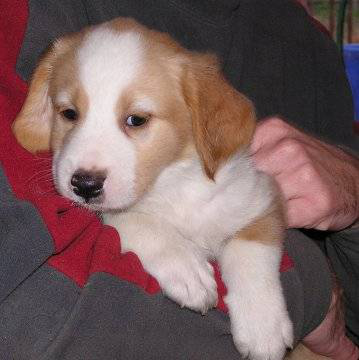

In [27]:
Image.open('train/dog.9966.jpg')

In [46]:
cd ..

/home/mwpl/DeepLearningITV601/Datasets/CatvsDog


In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                       rotation_range = 20,
                                                       width_shift_range=0.2,
                                                       height_shift_range=0.2,
                                                       vertical_flip = True)

In [29]:
data = keras.preprocessing.image.DirectoryIterator('train', target_size = (128, 128), image_data_generator = datagen,
                                            color_mode = 'rgb', class_mode = 'binary', batch_size = 64)

Found 25000 images belonging to 2 classes.


In [30]:
for train, label in data:
    val = train, label
    break

In [31]:
val[0].shape

(64, 128, 128, 3)

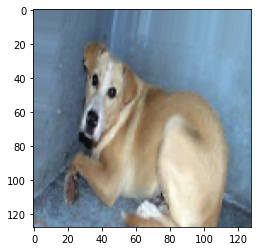

In [36]:
plt.imshow(val[0][0])

In [37]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 124, 128)     147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 256)       590080    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 256)      

In [39]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy', 'binary_accuracy'])

In [40]:
model.fit_generator(data, epochs = 5)

Epoch 1/5
 27/391 [=>............................] - ETA: 5:22 - loss: 2.8136 - accuracy: 0.4809 - binary_accuracy: 0.4809

KeyboardInterrupt: 